# Feature engineering

# Overview the data

In [109]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
data = pd.read_csv("data/historical_data.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [111]:
data.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [112]:
# convert time features into datetime type
# and order by the order created time
df = data
df['created_at']= pd.to_datetime(data["created_at"]) 
df['actual_delivery_time']= pd.to_datetime(data["actual_delivery_time"]) 
df = df.sort_values(by=['created_at'],ascending=True)

# generate the target variable "dur"
df['dur'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds()

# convert creat_at to hour, weekday, and month features
df['start_hour'] = df['created_at'].dt.hour
df['start_weekday'] = df['created_at'].dt.weekday
df['start_month'] = df['created_at'].dt.month

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,3560,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,446,412.0,8516859.0,5,6,10
43519,1.0,2015-01-21 15:22:03,2015-01-21 16:17:43,2966,dessert,4.0,2,1058,2,219,799,2.0,1.0,1.0,251,463.0,3340.0,15,2,1
148754,3.0,2015-01-21 15:31:51,2015-01-21 16:16:34,1303,cafe,4.0,2,690,2,195,255,2.0,0.0,1.0,251,458.0,2683.0,15,2,1
187014,1.0,2015-01-21 15:39:16,2015-01-21 15:58:11,5551,NaN,4.0,3,1867,3,449,529,4.0,1.0,1.0,251,284.0,1135.0,15,2,1
10265,1.0,2015-01-21 15:40:42,2015-01-21 16:22:37,602,cafe,4.0,3,955,3,245,345,3.0,2.0,2.0,251,377.0,2515.0,15,2,1


In [113]:
df.shape

(197428, 20)

In [114]:
df.isnull().sum() # contains missing value

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dur                                                 7
start_hour                                          0
start_weekday               

Note that the missing values in **dur** is caused by the missing values in **actual_delivery_time**. In the `Handle Outliers` section, I would delete the rows with missing value in **actual_delivery_time** 

In [115]:
for i in df.columns:
    print(i,len(df[i].value_counts()))

market_id 6
created_at 180985
actual_delivery_time 178110
store_id 6743
store_primary_category 74
order_protocol 7
total_items 57
subtotal 8368
num_distinct_items 20
min_item_price 2312
max_item_price 2652
total_onshift_dashers 172
total_busy_dashers 159
total_outstanding_orders 281
estimated_order_place_duration 98
estimated_store_to_consumer_driving_duration 1336
dur 7134
start_hour 19
start_weekday 7
start_month 3


Note that the categorical feature **store_id** contains too much distinct value. In the `Binning` section, I choose to binning this feature to make it more regularized.

# Binning

In [116]:
df['store_id'].value_counts()

6865    937
1311    863
314     815
1686    765
3937    721
       ... 
5637      1
5676      1
505       1
5509      1
4398      1
Name: store_id, Length: 6743, dtype: int64

In [117]:
df['store_id_showup'] = None
# df['store_id'].fillna(value=0, inplace=True)
for i in df['store_id'].value_counts().index:
    cnt = df['store_id'].value_counts()[i]
    idxs = df[df['store_id']==i].index
    df.loc[idxs,['store_id_showup']] = cnt

In [118]:
df['store_id_showup'] = pd.cut(df['store_id_showup'], bins=[0,100,300,500,1000], 
                               labels=["0-100", "100-300", "300-500", "500-1000"])

In [119]:
df.drop(['store_id'],axis = 1,inplace = True)

In [120]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month,store_id_showup
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,446,412.0,8516859.0,5,6,10,0-100
43519,1.0,2015-01-21 15:22:03,2015-01-21 16:17:43,dessert,4.0,2,1058,2,219,799,2.0,1.0,1.0,251,463.0,3340.0,15,2,1,0-100
148754,3.0,2015-01-21 15:31:51,2015-01-21 16:16:34,cafe,4.0,2,690,2,195,255,2.0,0.0,1.0,251,458.0,2683.0,15,2,1,0-100
187014,1.0,2015-01-21 15:39:16,2015-01-21 15:58:11,NaN,4.0,3,1867,3,449,529,4.0,1.0,1.0,251,284.0,1135.0,15,2,1,0-100
10265,1.0,2015-01-21 15:40:42,2015-01-21 16:22:37,cafe,4.0,3,955,3,245,345,3.0,2.0,2.0,251,377.0,2515.0,15,2,1,0-100


# Handle Outliers

### 1. drop rows where actual_delivery_time is missing

In [121]:
df.drop(df[df.actual_delivery_time.isnull()].index, inplace = True)

In [122]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month,store_id_showup
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,446,412.0,8516859.0,5,6,10,0-100
43519,1.0,2015-01-21 15:22:03,2015-01-21 16:17:43,dessert,4.0,2,1058,2,219,799,2.0,1.0,1.0,251,463.0,3340.0,15,2,1,0-100
148754,3.0,2015-01-21 15:31:51,2015-01-21 16:16:34,cafe,4.0,2,690,2,195,255,2.0,0.0,1.0,251,458.0,2683.0,15,2,1,0-100
187014,1.0,2015-01-21 15:39:16,2015-01-21 15:58:11,NaN,4.0,3,1867,3,449,529,4.0,1.0,1.0,251,284.0,1135.0,15,2,1,0-100
10265,1.0,2015-01-21 15:40:42,2015-01-21 16:22:37,cafe,4.0,3,955,3,245,345,3.0,2.0,2.0,251,377.0,2515.0,15,2,1,0-100


### 2. drop rows where have unusual negative values

In [123]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month
count,196434.000000,196426.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,181159.000000,181159.000000,181159.000000,197421.000000,196895.000000,1.974210e+05,197421.000000,197421.000000,197421.000000
mean,2.978700,2.882358,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.806866,41.738787,58.047969,308.560244,545.357089,2.908257e+03,8.467362,3.218923,1.653157
std,1.524879,1.503775,2.666552,1823.106256,1.630261,522.044061,558.416236,34.525913,32.145163,52.660056,90.139725,219.353976,1.922961e+04,8.658781,2.045759,0.476349
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02,0.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03,2.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03,3.000000,3.000000,2.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03,19.000000,5.000000,2.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06,23.000000,6.000000,10.000000


Note that the featrues **min_item_price, total_onshift_dashers, total_outstanding_orders, total_busy_dashers** have negative values, which is weird. I choose to drop these value to regularize the data

In [124]:
for col in ['min_item_price', 'total_onshift_dashers', 'total_outstanding_orders', 'total_busy_dashers']:
    df.drop(df[df[col] < 0].index, inplace = True) 

### 3. drop outliers

/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

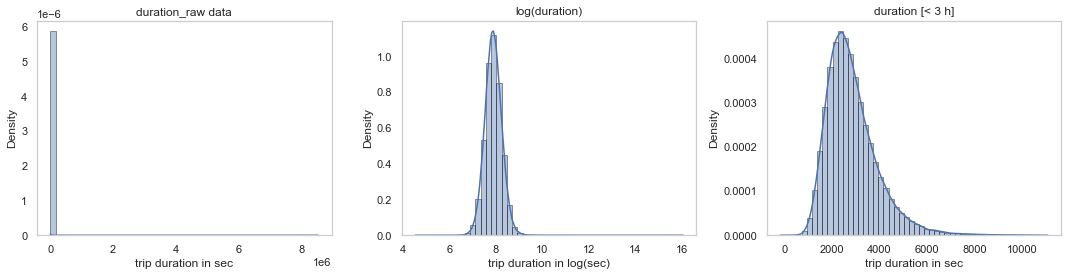

In [125]:
def dur_distribution():
    fig,sub = plt.subplots(1,3,figsize=(15,4))
    sns.distplot(df["dur"], hist_kws={"edgecolor":"black"}, ax=sub[0])
    sns.distplot(np.log1p(df["dur"]), hist_kws={"edgecolor":"black"}, ax=sub[1])
    sns.distplot(df[df["dur"]<60*180]["dur"], hist_kws={"edgecolor":"black"}, ax=sub[2])

    counter = 0
    for name, subplot in zip(["duration_raw data","log(duration)", "duration [< 3 h]"], sub.flatten()):
        subplot.set_title("{}".format(name))
        subplot.grid()
        if counter < 3:
            if name == "log(duration)": 
                subplot.set_xlabel("trip duration in log(sec)")
            else:
                subplot.set_xlabel("trip duration in sec")
        counter += 1
    fig.tight_layout()
dur_distribution()

The duration has large outliers in the right tail. The log of duration and duration[<3h] follows the right skewed distribution. 
The main part of the data is distributed between 0 and 6000s(1.67 hours)

In [126]:
upper_lim = df['dur'].quantile(.995)
lower_lim = df['dur'].quantile(.005)
outliers = df[(df['dur'] > upper_lim) | (df['dur'] < lower_lim)]
df = df[(df['dur'] < upper_lim) & (df['dur'] > lower_lim)]

In [127]:
print("The number of outliers is :", outliers.shape[0])
print("Max outlier:", np.round(outliers['dur'].max()/60/60,2), "hours")
print("Min outlier:", outliers['dur'].min(), "seconds")

The number of outliers is : 1972
Max outlier: 2365.79 hours
Min outlier: 101.0 seconds


/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

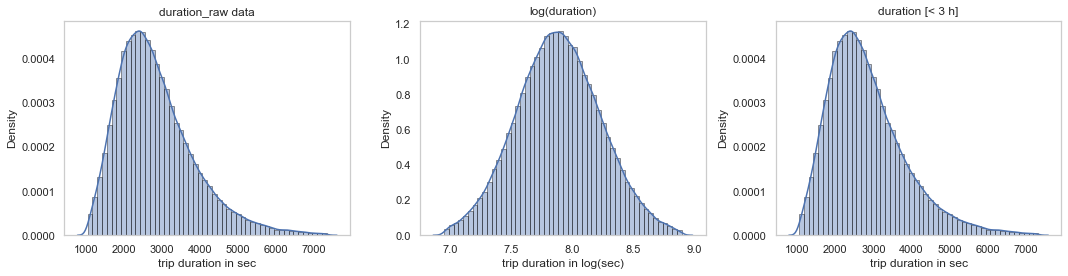

In [128]:
dur_distribution()

After dropping the outliers, the duration with raw data also follows the right skewed distribution.

# EDA -- Correlation Matrix 

In [129]:
# filter out all the 
df_num = df.select_dtypes([int,float]).iloc[:,1:].drop(['order_protocol'], axis=1)
print(len(df_num.columns))
df_num.columns

14


Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'dur', 'start_hour',
       'start_weekday', 'start_month'],
      dtype='object')

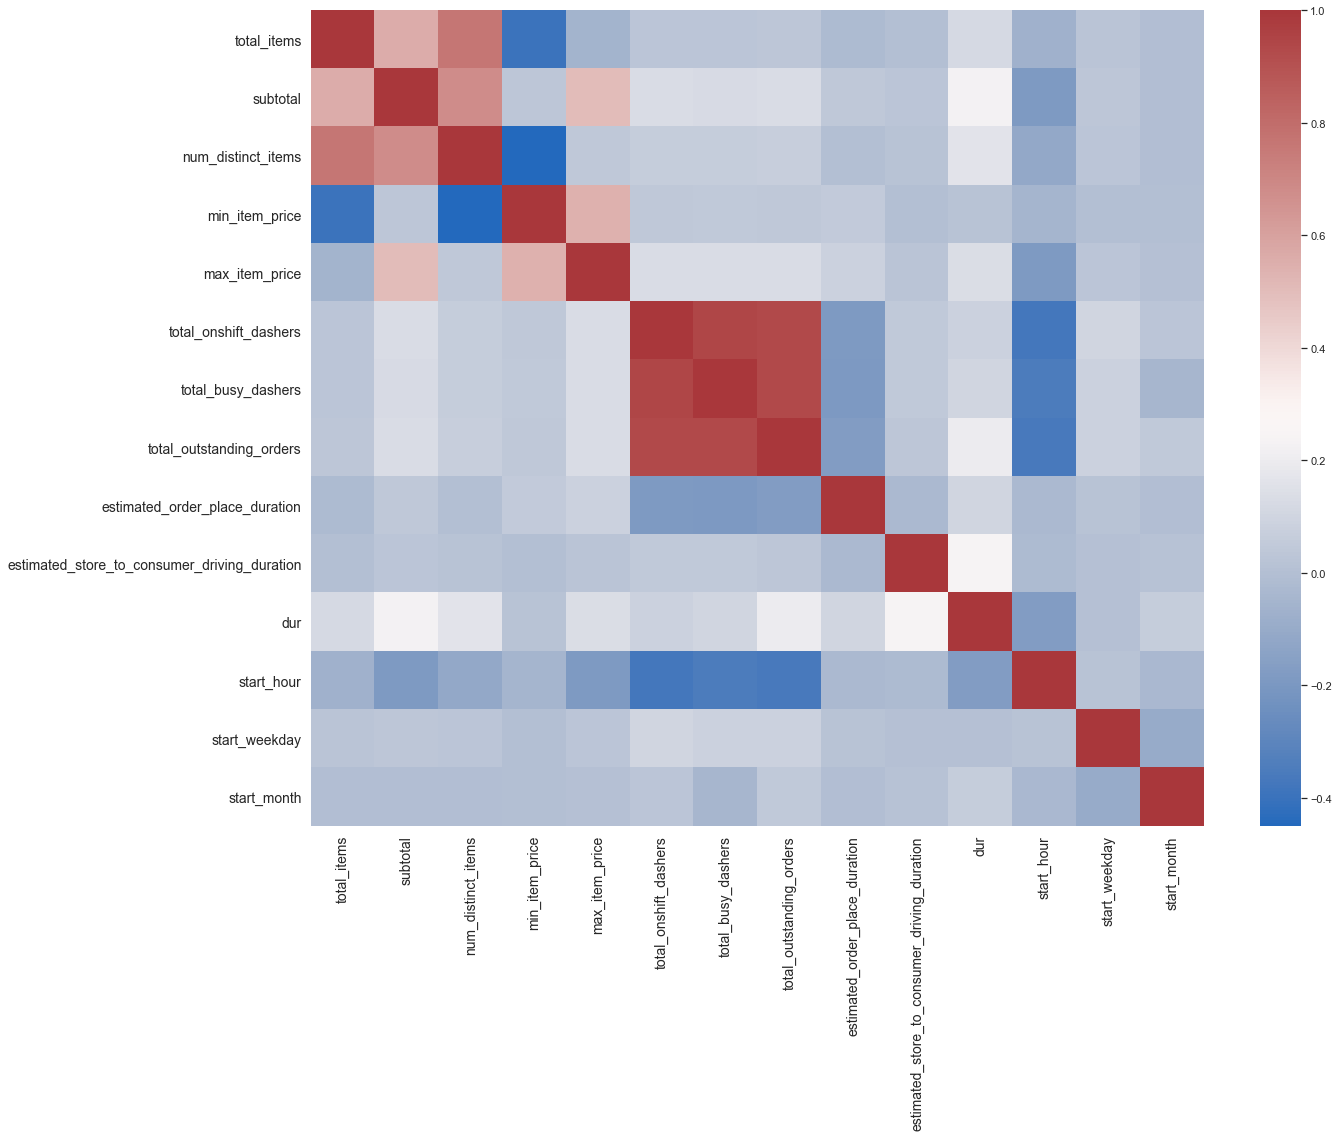

In [130]:
corr = df_num.corr()
cmap = sns.color_palette("vlag", as_cmap=True)
f = plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr, cmap = cmap)
plt.setp(ax.get_xticklabels(), rotation=90)
# plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=14, rotation=30)
# plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=14)
ax.tick_params(labelsize=14)

## 1. Create Time & Delivery Time

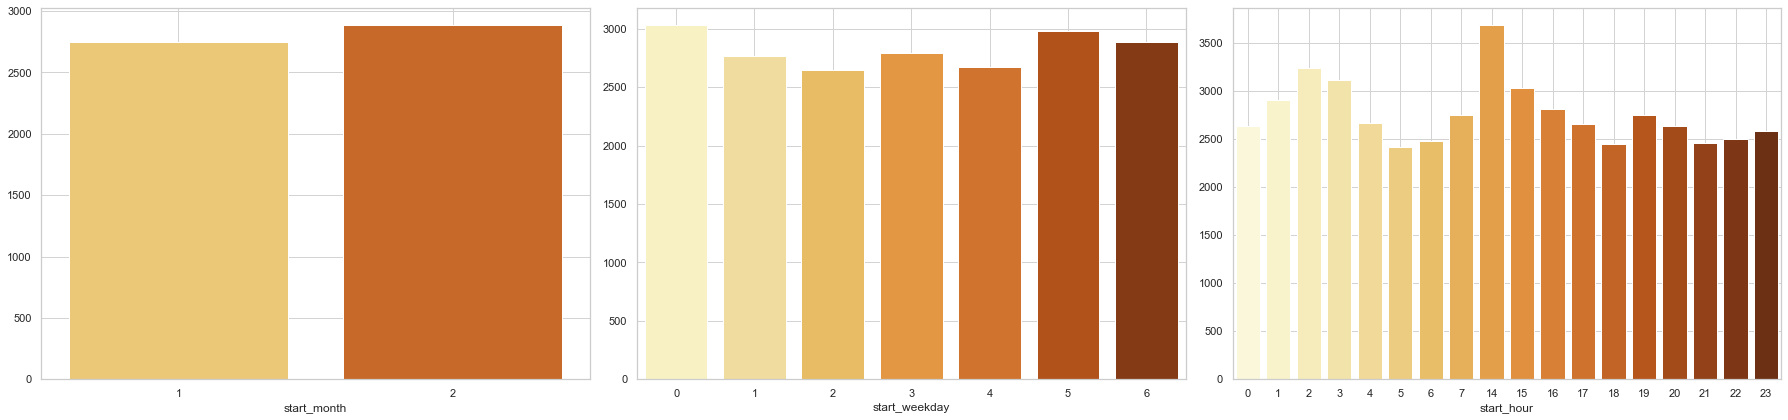

In [131]:
fig, sub = plt.subplots(1,3,figsize=(25,6))
# sns.color_palette("rocket")
for name, subplot in zip(["start_month","start_weekday", "start_hour"], sub.flatten()):
    
    data = df.groupby(name)["dur"].mean()
    sns.barplot(x=data.index, y=data.values, ax=subplot, palette="YlOrBr")
    subplot.grid(color="lightgrey")

fig.tight_layout()

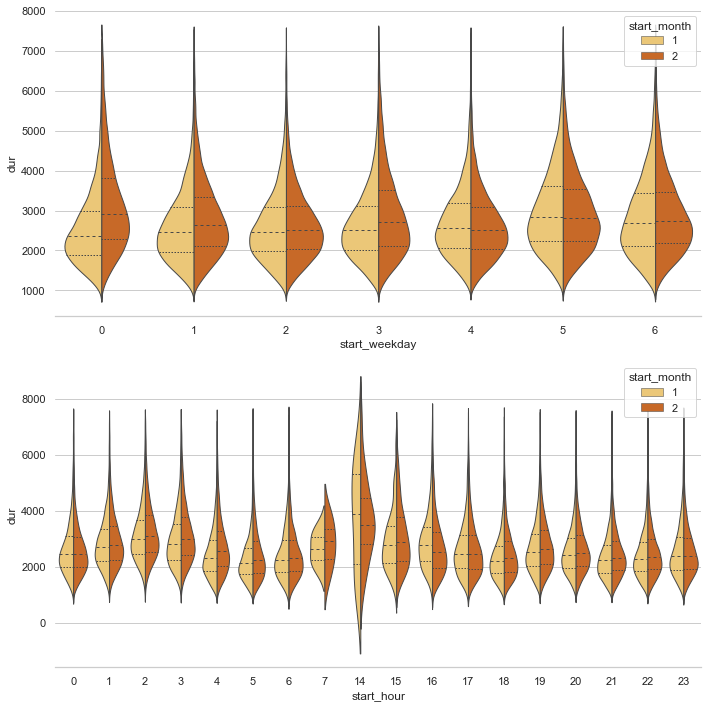

In [132]:
fig, sub = plt.subplots(2,1,figsize=(10,10))
sns.set_theme(style="whitegrid")
for name, subplot in zip(["start_weekday", "start_hour"], sub.flatten()):
    cmap = sns.color_palette("vlag", as_cmap=True)
    sns.violinplot(data=df, x=name, y="dur", hue="start_month",
               split=True, inner="quart", linewidth=1,
               palette="YlOrBr",ax=subplot)
    sns.despine(left=True)
fig.tight_layout()

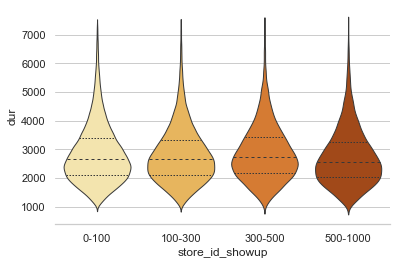

In [133]:
cmap = sns.color_palette("vlag", as_cmap=True)
sns.violinplot(data=df, x="store_id_showup", y="dur", 
               split=True, inner="quart", linewidth=1,
               palette="YlOrBr")
sns.despine(left=True)

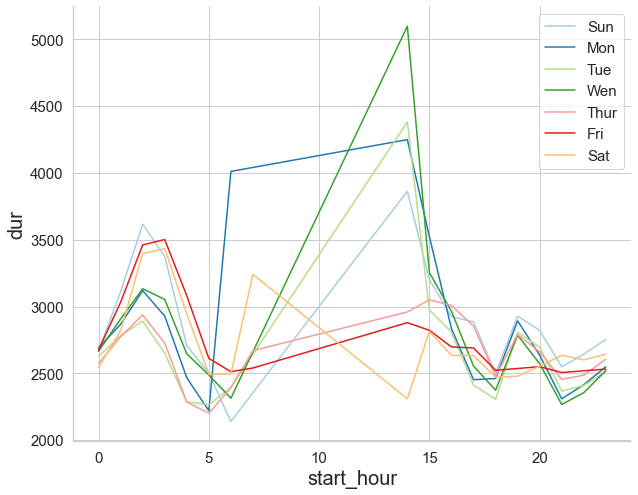

In [200]:
plt.figure(figsize=(10, 8))
summary_hour_duration = pd.DataFrame(df.groupby(['start_weekday','start_hour'])['dur'].mean())
summary_hour_duration.reset_index(inplace = True)
sns.lineplot(data=summary_hour_duration,x = "start_hour", y = "dur", hue="start_weekday", palette = 'Paired')
plt.legend(['Sun', 'Mon', "Tue", "Wen", "Thur","Fri","Sat"])
plt.rc('axes', labelsize=20)    
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)   
plt.rc('legend', fontsize=15)  
sns.despine(bottom = False)


## 2. Order Features

/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


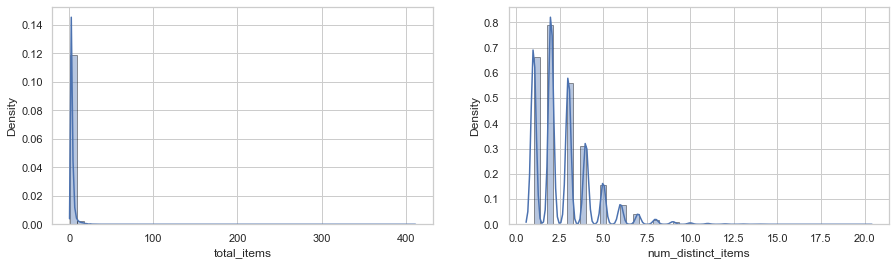

In [139]:
def item_num_distribution():    
    fig,sub = plt.subplots(1,2,figsize=(15,4))
    sns.distplot(df["total_items"], hist_kws={"edgecolor":"black"}, ax=sub[0])
    sns.distplot(df["num_distinct_items"], hist_kws={"edgecolor":"black"}, ax=sub[1])
item_num_distribution()

In [140]:
print(df['total_items'].quantile(.75))
print(df['total_items'].quantile(.999))
print(df['total_items'].quantile(1))

4.0
25.0
411.0


In [141]:
df['cat_item_num'] = pd.cut(df['total_items'], bins=[0,df['total_items'].quantile(.75), df['total_items'].quantile(.999),df['total_items'].quantile(1)], labels=["Small", "Mid", "Large"])

In [142]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month,store_id_showup,cat_item_num
43519,1.0,2015-01-21 15:22:03,2015-01-21 16:17:43,dessert,4.0,2,1058,2,219,799,...,1.0,1.0,251,463.0,3340.0,15,2,1,0-100,Small
148754,3.0,2015-01-21 15:31:51,2015-01-21 16:16:34,cafe,4.0,2,690,2,195,255,...,0.0,1.0,251,458.0,2683.0,15,2,1,0-100,Small
187014,1.0,2015-01-21 15:39:16,2015-01-21 15:58:11,NaN,4.0,3,1867,3,449,529,...,1.0,1.0,251,284.0,1135.0,15,2,1,0-100,Small
10265,1.0,2015-01-21 15:40:42,2015-01-21 16:22:37,cafe,4.0,3,955,3,245,345,...,2.0,2.0,251,377.0,2515.0,15,2,1,0-100,Small
188797,1.0,2015-01-21 15:41:33,2015-01-21 16:35:14,chinese,3.0,3,825,1,125,125,...,0.0,0.0,251,534.0,3221.0,15,2,1,0-100,Small


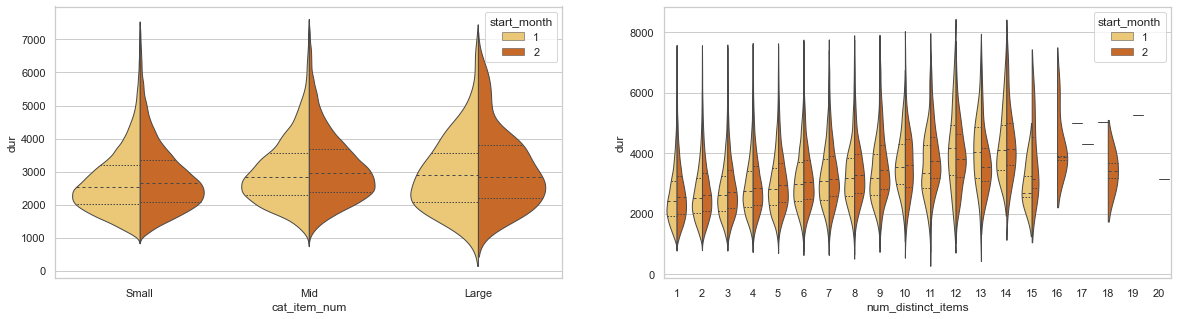

In [143]:
fig,sub = plt.subplots(1,2,figsize=(20,5))
i = 0
for col in ['cat_item_num','num_distinct_items']:
    sns.violinplot(data=df, x=col, y="dur", hue = 'start_month',
               split=True, inner="quart", linewidth=1,
               palette="YlOrBr", ax=sub[i])
    i+=1

## 3. Marked Features

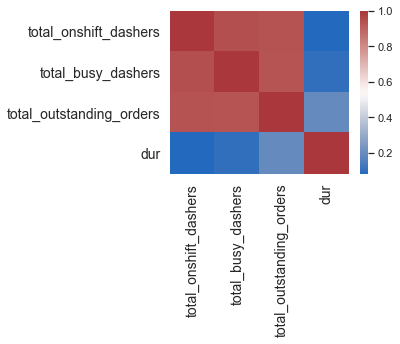

In [168]:
market_features = df[['total_onshift_dashers','total_busy_dashers','total_outstanding_orders','dur']]
corr = market_features.corr()
cmap = sns.color_palette("vlag", as_cmap=True)
f = plt.figure(figsize=(4, 3))
ax = sns.heatmap(corr, cmap = cmap)
plt.setp(ax.get_xticklabels(), rotation=90)
# plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=14, rotation=30)
# plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=14)
ax.tick_params(labelsize=14)

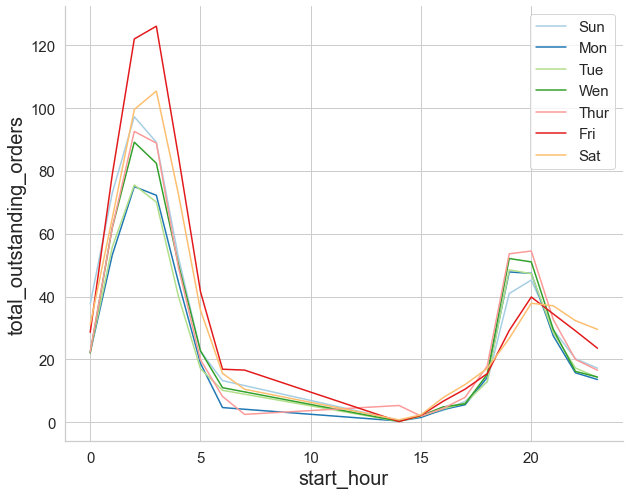

In [208]:
plt.figure(figsize=(10, 8))
market_hour_summary = pd.DataFrame(df.groupby(['start_weekday','start_hour'])['total_outstanding_orders'].mean())
market_hour_summary.reset_index(inplace = True)
sns.lineplot(data=market_hour_summary,x = "start_hour", y = "total_outstanding_orders", hue="start_weekday", palette = 'Paired')
plt.legend(['Sun', 'Mon', "Tue", "Wen", "Thur","Fri","Sat"])
plt.rc('axes', labelsize=20)    
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)   
plt.rc('legend', fontsize=15)  
sns.despine(bottom = False)

## 4. Estimated Duration from other models

In [144]:
# add new feature by adding two estimated time
df['total_estimated_dur'] = df["estimated_order_place_duration"] + df["estimated_store_to_consumer_driving_duration"]

/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

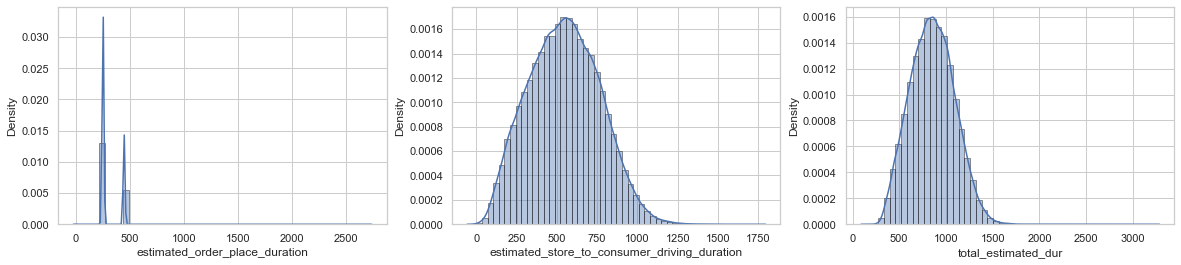

In [145]:
fig,sub = plt.subplots(1,3,figsize=(20,4))
sns.distplot(df["estimated_order_place_duration"], hist_kws={"edgecolor":"black"}, ax=sub[0])
# sns.distplot(df["subtotal"], hist_kws={"edgecolor":"black"}, ax=sub[1])
sns.distplot(df["estimated_store_to_consumer_driving_duration"], hist_kws={"edgecolor":"black"}, ax=sub[1])
sns.distplot(df["total_estimated_dur"], hist_kws={"edgecolor":"black"}, ax=sub[2])

In [146]:
df['date'] = df['created_at'].dt.strftime("%m-%d")

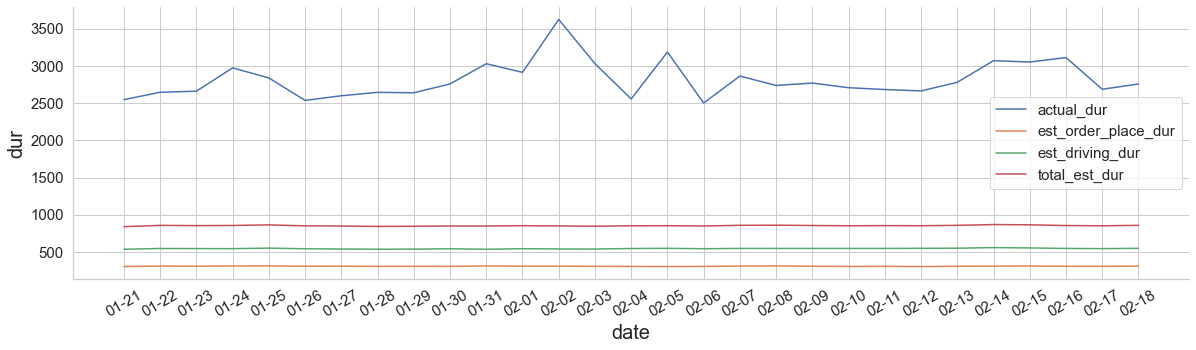

In [207]:
plt.figure(figsize=(20, 5))
summary_duration = pd.DataFrame(df.groupby(['date'])['dur'].mean())
summary_estimated_placed_dur = pd.DataFrame(df.groupby(['date'])['estimated_order_place_duration'].mean())
summary_estimated_drive_dur = pd.DataFrame(df.groupby(['date'])['estimated_store_to_consumer_driving_duration'].mean())
summary_estimated_total = pd.DataFrame(df.groupby(['date'])['total_estimated_dur'].mean())
summary_duration.reset_index(inplace = True)
sns.lineplot(data=summary_duration,x = "date", y = "dur", palette = 'Paired',label = 'actual_dur')
sns.lineplot(data=summary_estimated_placed_dur,x = "date", y = "estimated_order_place_duration", palette = 'Paired',label = 'est_order_place_dur')
sns.lineplot(data=summary_estimated_drive_dur,x = "date", y = "estimated_store_to_consumer_driving_duration", palette = 'Paired',label = 'est_driving_dur')
sns.lineplot(data=summary_estimated_total,x = "date", y = "total_estimated_dur", palette = 'Paired',label = 'total_est_dur')
plt.xticks(rotation = 30)
sns.despine(bottom = False)

In [137]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month
count,194370.000000,194358.000000,195345.000000,195345.000000,195345.000000,195345.000000,195345.000000,179243.000000,179243.000000,179243.000000,195345.000000,194823.000000,195345.000000,195345.000000,195345.000000,195345.000000
mean,2.980517,2.880442,3.197814,2686.207290,2.673281,686.387105,1160.723965,44.929342,41.850142,58.209314,308.585282,546.222284,2837.837554,8.456720,3.224275,1.652871
std,1.524193,1.503579,2.662881,1821.735141,1.629465,521.591867,557.992280,34.564437,32.170841,52.702686,90.160255,218.756829,1013.994272,8.656986,2.044068,0.476059
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1044.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,1410.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,384.000000,2110.000000,2.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2205.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000,2660.000000,3.000000,3.000000,2.000000
75%,4.000000,4.000000,4.000000,3397.000000,3.000000,949.000000,1395.000000,66.000000,62.000000,85.000000,446.000000,703.000000,3372.000000,19.000000,5.000000,2.000000
max,6.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,1739.000000,7333.000000,23.000000,6.000000,2.000000


In [ ]:
df['cat_item_num'] = pd.cut(df['total_items'], bins=[0,df['total_items'].quantile(.75), df['total_items'].quantile(.999),df['total_items'].quantile(1)], labels=["Small", "Mid", "Large"])

# Save data

drop the useless feature before preprocessing.

In [64]:
df.drop(['created_at','actual_delivery_time','date','cat_item_num','total_estimated_dur'],axis = 1,inplace = True)

In [65]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dur,start_hour,start_weekday,start_month,store_id_showup
43519,1.0,dessert,4.0,2,1058,2,219,799,2.0,1.0,1.0,251,463.0,3340.0,15,2,1,0-100
148754,3.0,cafe,4.0,2,690,2,195,255,2.0,0.0,1.0,251,458.0,2683.0,15,2,1,0-100
187014,1.0,NaN,4.0,3,1867,3,449,529,4.0,1.0,1.0,251,284.0,1135.0,15,2,1,0-100
10265,1.0,cafe,4.0,3,955,3,245,345,3.0,2.0,2.0,251,377.0,2515.0,15,2,1,0-100
188797,1.0,chinese,3.0,3,825,1,125,125,0.0,0.0,0.0,251,534.0,3221.0,15,2,1,0-100


In [66]:
df.to_csv(r'data/df_filtered.csv', index = False)